In [ ]:
import numpy as np
import csv
from scipy.linalg import sqrtm
from scipy.linalg import logm

# Helper Functions
def random_density_matrix(dim):
    """
    Generate a random density matrix of dimension `dim`.
    """
    psi = np.random.randn(dim, dim) + 1j * np.random.randn(dim, dim)
    rho = psi @ psi.conj().T
    return rho / np.trace(rho)

def is_entangled(rho):
    """
    Use the PPT criterion to check if a bipartite state is entangled.
    """
    dim = int(np.sqrt(len(rho)))
    rho_reshaped = rho.reshape((dim, dim, dim, dim))
    rho_partial_transpose = np.transpose(rho_reshaped, (0, 2, 1, 3)).reshape((dim**2, dim**2))
    eigenvalues = np.linalg.eigvals(rho_partial_transpose)
    return np.any(eigenvalues < 0)  # Entangled if any eigenvalue is negative

def von_neumann_entropy(rho):
    """
    Calculate the Von Neumann entropy of a density matrix.
    """
    eigenvalues = np.linalg.eigvals(rho)
    eigenvalues = eigenvalues[eigenvalues > 0]  # Exclude zero eigenvalues for log calculation
    return -np.sum(eigenvalues * np.log(eigenvalues))

def purity(rho):
    """
    Calculate the purity of a density matrix.
    """
    return np.trace(rho @ rho).real

def fidelity_with_bell_state(rho):
    """
    Calculate the fidelity of the state with the Bell state |\u03A6+>.
    """
    bell_state = np.array([[1, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0], [1, 0, 0, 1]]) / 2
    fidelity = np.trace(sqrtm(sqrtm(rho) @ bell_state @ sqrtm(rho)))
    return fidelity.real

def partial_transpose_eigenvalues(rho):
    """
    Calculate the eigenvalues of the partially transposed density matrix.
    """
    dim = int(np.sqrt(len(rho)))
    rho_reshaped = rho.reshape((dim, dim, dim, dim))
    rho_partial_transpose = np.transpose(rho_reshaped, (0, 2, 1, 3)).reshape((dim**2, dim**2))
    eigenvalues = np.linalg.eigvals(rho_partial_transpose)
    return eigenvalues.real.tolist()

def generate_dataset(num_samples):
    """
    Generate a dataset of quantum states with labels (0 for separable, 1 for entangled) and additional parameters.
    """
    dataset = []

    for _ in range(num_samples):
        if np.random.rand() < 0.5:
            # Generate separable state
            psi_A = random_density_matrix(2)
            psi_B = random_density_matrix(2)
            rho_sep = np.kron(psi_A, psi_B)
            rho_sep = rho_sep / np.trace(rho_sep)
            label = 0
            rho = rho_sep
        else:
            # Generate entangled state
            rho_ent = random_density_matrix(4)
            while not is_entangled(rho_ent):
                rho_ent = random_density_matrix(4)
            label = 1
            rho = rho_ent


        flattened_rho = rho.flatten().tolist()
        entropy = von_neumann_entropy(rho)
        state_purity = purity(rho)
        fidelity = fidelity_with_bell_state(rho)
        pt_eigenvalues = partial_transpose_eigenvalues(rho)


        dataset.append((flattened_rho, entropy, state_purity, fidelity, pt_eigenvalues, label))

    return dataset

# Generate Dataset
num_samples = 100000
print("Generating dataset...")
dataset = generate_dataset(num_samples)
print("Dataset generated successfully.")

filename = "quantum_states_full_dataset.csv"
print(f"Saving dataset to {filename}...")
with open(filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["flattened_state", "entropy", "purity", "fidelity", "pt_eigenvalues", "label"])
    for flattened_rho, entropy, state_purity, fidelity, pt_eigenvalues, label in dataset:
        writer.writerow([flattened_rho, entropy, state_purity, fidelity, pt_eigenvalues, label])
print("Dataset saved.")


Generating dataset...
Dataset generated successfully.
Saving dataset to quantum_states_full_dataset.csv...
Dataset saved.


In [ ]:
pip install pennylane[torch]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 59.2 MB/s eta 0:00:00


Epoch 1/10, Train Loss: 0.4237, Train Accuracy: 80.05%, Val Loss: 0.4130, Val Accuracy: 80.14%
Epoch 2/10, Train Loss: 0.4081, Train Accuracy: 80.47%, Val Loss: 0.4069, Val Accuracy: 80.41%
Epoch 3/10, Train Loss: 0.4067, Train Accuracy: 80.42%, Val Loss: 0.4056, Val Accuracy: 80.42%
Epoch 4/10, Train Loss: 0.4040, Train Accuracy: 80.65%, Val Loss: 0.4076, Val Accuracy: 80.44%
Epoch 5/10, Train Loss: 0.4019, Train Accuracy: 80.55%, Val Loss: 0.4017, Val Accuracy: 80.39%
Epoch 6/10, Train Loss: 0.4001, Train Accuracy: 80.53%, Val Loss: 0.4052, Val Accuracy: 80.27%
Epoch 7/10, Train Loss: 0.3994, Train Accuracy: 80.60%, Val Loss: 0.3997, Val Accuracy: 80.53%
Epoch 8/10, Train Loss: 0.3990, Train Accuracy: 80.63%, Val Loss: 0.3993, Val Accuracy: 80.40%
Epoch 9/10, Train Loss: 0.3980, Train Accuracy: 80.61%, Val Loss: 0.3983, Val Accuracy: 80.56%
Epoch 10/10, Train Loss: 0.3978, Train Accuracy: 80.63%, Val Loss: 0.3995, Val Accuracy: 80.75%


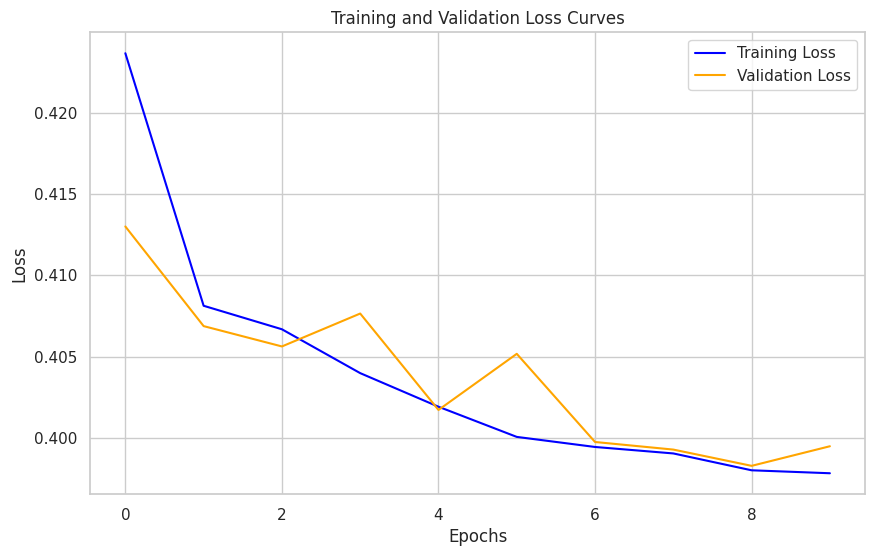

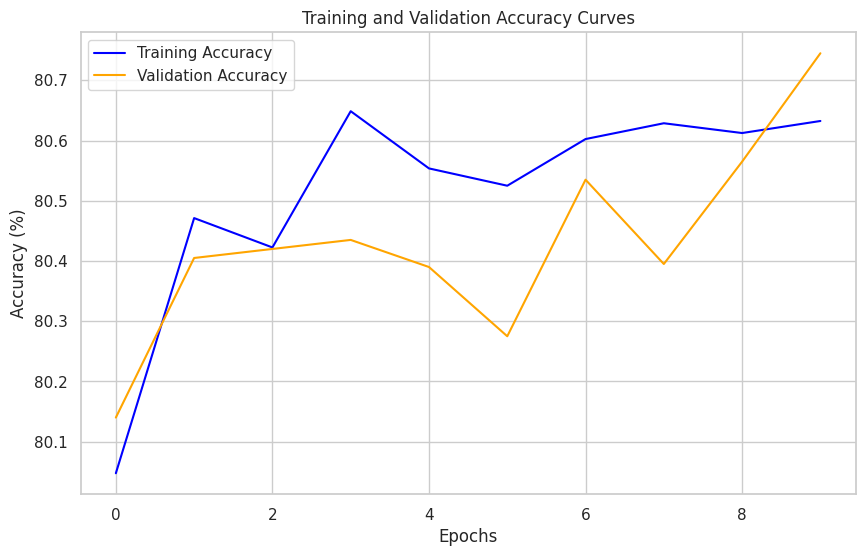

Final Accuracy: 80.72%


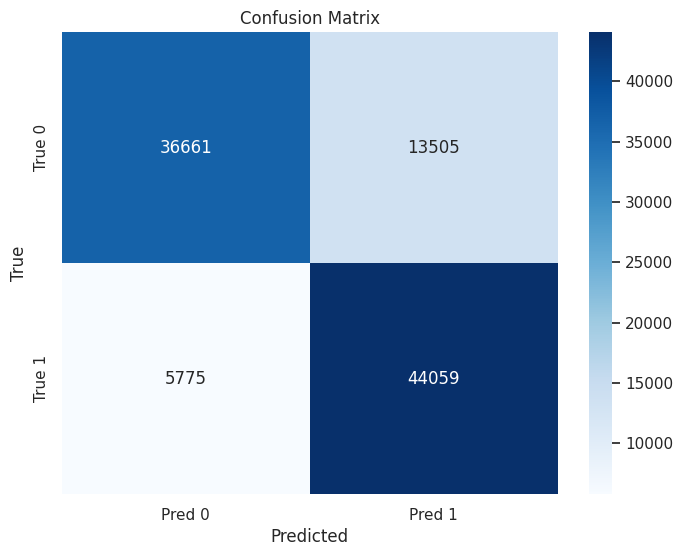

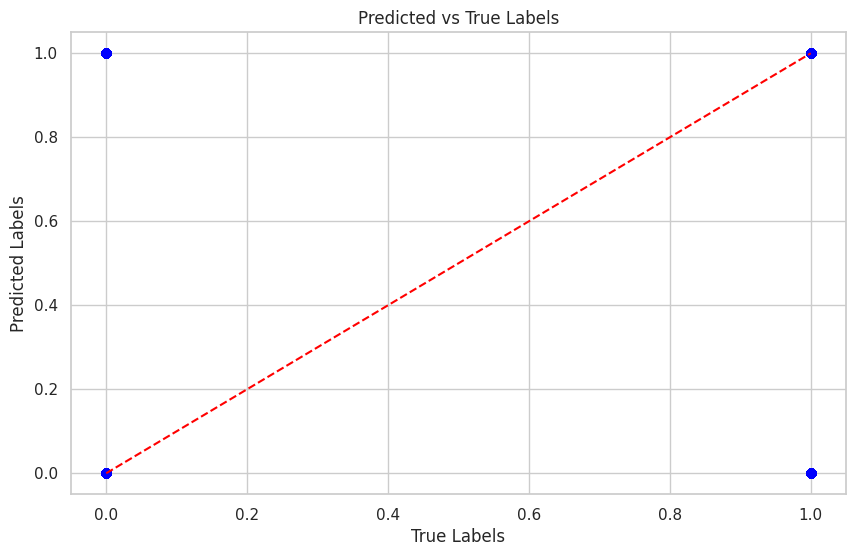

Model saved to hybrid_qnn_model.pth


In [ ]:
import pennylane as qml
from pennylane import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load dataset
data = pd.read_csv("quantum_states_full_dataset.csv")

# Ensure the features are numeric and handle missing values
data = data.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric, invalid parsing will be set as NaN
data = data.fillna(0)  # Fill NaN values with 0 or use another method to handle them

X = data.drop(columns=["label"]).values  # Features
y = data["label"].values  # Labels

# Normalize features (optional, based on your need)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_std[X_std == 0] = 1  # Avoid division by zero
X = (X - X_mean) / X_std  # Standardization (z-score normalization)

# Ensure the features and labels are numpy arrays
X = np.array(X)  # Using qml.numpy here for consistency
y = np.array(y)

# Define Quantum Device
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

# Quantum Circuit
def quantum_circuit(inputs, weights):
    for i in range(n_qubits):
        qml.RY(inputs[:, i], wires=i)  # Apply RY gate on each qubit in the batch
    qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# QNode
weight_shapes = {"weights": (3, n_qubits)}
qnode = qml.QNode(quantum_circuit, dev)

# Quantum Layer
qlayer = qml.qnn.TorchLayer(qnode, weight_shapes)

# Hybrid Model
class HybridQNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(X.shape[1], n_qubits)  # Map features to qubits
        self.qlayer = qlayer  # Quantum layer
        self.fc2 = torch.nn.Linear(n_qubits, 1)  # Map qubit outputs to prediction

    def forward(self, x):
        x = self.fc1(x)  # Linear mapping from input to qubits
        x = self.qlayer(x)  # Apply the quantum layer
        x = torch.sigmoid(self.fc2(x))  # Sigmoid output for binary classification
        return x

# Prepare DataLoader
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)
dataset = TensorDataset(X_tensor, y_tensor)

# Split into training and validation sets (80% train, 20% validation)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoader for both train and validation sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Model, Loss, and Optimizer
model = HybridQNN()
criterion = torch.nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Lists for storing training statistics
train_losses = []  # Ensure this is initialized
val_losses = []  # Ensure this is initialized
train_accuracies = []  # For training accuracy
val_accuracies = []  # For validation accuracy

# Training Loop
epochs = 10
for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0
    correct_train = 0
    total_train = 0

    # Training Loop
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X).squeeze()
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        # Track training loss
        epoch_train_loss += loss.item()

        # Track training accuracy
        predicted = (outputs >= 0.5).float()
        correct_train += (predicted == batch_y).sum().item()
        total_train += batch_y.size(0)

    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Training Accuracy
    train_accuracy = (correct_train / total_train) * 100  # In percentage
    train_accuracies.append(train_accuracy)

    # Validation Loop
    model.eval()
    epoch_val_loss = 0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X).squeeze()
            loss = criterion(outputs, batch_y)
            epoch_val_loss += loss.item()

            # Track validation accuracy
            predicted = (outputs >= 0.5).float()
            correct_val += (predicted == batch_y).sum().item()
            total_val += batch_y.size(0)

    avg_val_loss = epoch_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Validation Accuracy
    val_accuracy = (correct_val / total_val) * 100  # In percentage
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

# Plot Training and Validation Loss Curves
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_losses, label="Training Loss", color="blue")
plt.plot(range(epochs), val_losses, label="Validation Loss", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Curves")
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy Curves
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_accuracies, label="Training Accuracy", color="blue")
plt.plot(range(epochs), val_accuracies, label="Validation Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training and Validation Accuracy Curves")
plt.legend()
plt.grid(True)
plt.show()

# Evaluation
with torch.no_grad():
    y_pred = model(X_tensor).squeeze().round()
    accuracy = (y_pred == y_tensor).float().mean()
    print(f"Final Accuracy: {accuracy:.2%}")

# Confusion Matrix
cm = confusion_matrix(y_tensor, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Plot Predicted vs True Labels
plt.figure(figsize=(10, 6))
plt.scatter(y_tensor, y_pred, color='blue', alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Identity line
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("Predicted vs True Labels")
plt.grid(True)
plt.show()

# Save the trained model
model_path = "hybrid_qnn_model.pth"
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")
